In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_dogs')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/dogs-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_dogs', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_dogs' folder in your directory")

You may need to delete the existing 'img_align_dogs' folder in your directory


In [3]:
files = os.listdir('img_align_dogs')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('img_align_dogs', files[0]))
plt.imread(os.path.join('img_align_dogs', files[0]))

files = [os.path.join('img_align_dogs', file_i)
 for file_i in os.listdir('img_align_dogs')
 if '.jpg' in file_i]


img = plt.imread(files[21])

print(img)

img_align_dogs\flickr_dog_000001.jpg
[[[ 68  81  53]
  [ 67  80  52]
  [ 65  78  50]
  ...
  [ 49  65  38]
  [ 52  68  42]
  [ 55  71  45]]

 [[ 67  80  52]
  [ 66  79  51]
  [ 64  77  49]
  ...
  [ 53  69  42]
  [ 54  70  44]
  [ 55  71  45]]

 [[ 66  79  49]
  [ 65  78  50]
  [ 64  77  49]
  ...
  [ 58  74  47]
  [ 57  73  46]
  [ 55  71  44]]

 ...

 [[ 90 101  69]
  [ 87  98  66]
  [ 83  94  62]
  ...
  [235 231 232]
  [235 231 232]
  [234 230 231]]

 [[ 89 100  68]
  [ 87  98  66]
  [ 84  95  63]
  ...
  [236 232 233]
  [235 231 232]
  [235 231 232]]

 [[ 90 101  69]
  [ 88  99  67]
  [ 85  96  64]
  ...
  [236 232 233]
  [236 232 233]
  [235 231 232]]]


In [4]:
# -----------------------Homework section -------------------------

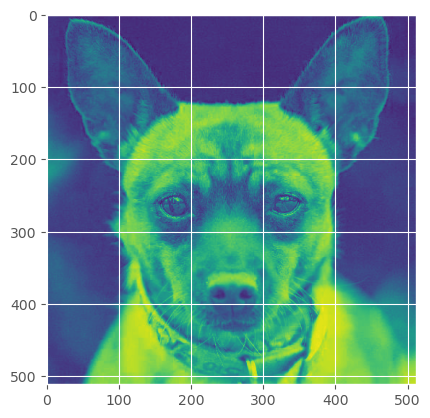

In [5]:
plt.imshow(img[:,:, 2])

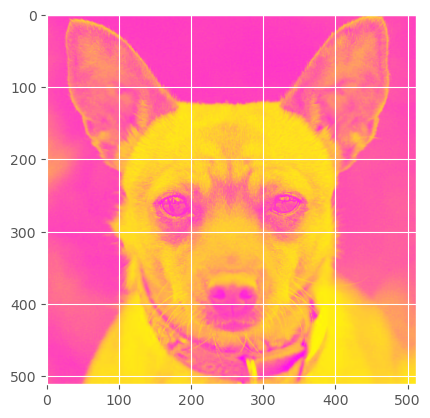

In [6]:
#https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py
plt.imshow(img[:, :, 1], cmap='spring') #colour mapping 'spring'

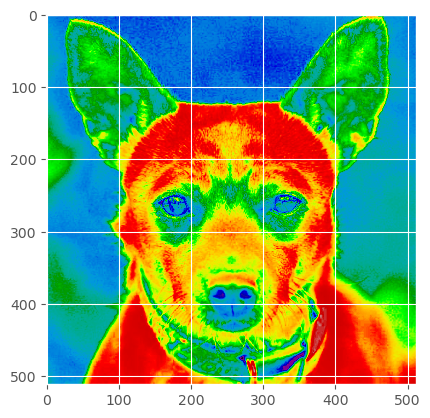

In [7]:
plt.imshow(img[:, :, 1], cmap='nipy_spectral') #colour mapping 'nipy_spectral'

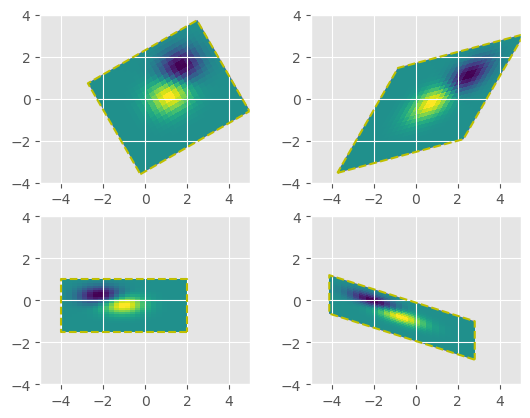

In [8]:
#https://matplotlib.org/stable/gallery/images_contours_and_fields/affine_image.html
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms


def get_image(): # generates 2D array of values that represent an image
   
    delta = 0.25 # create a meshgrid of x and y values within the range [-3, 3] with a step of 0.25
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2)
    return Z # calculates two Gaussian functions Z1 and Z2, subtracts them, and returns the resulting array Z.


def do_plot(ax, Z, transform): # "do_plot()" function takes three arguments: an axis object "ax", the image array "Z", and a transformation matrix "transform".
    im = ax.imshow(Z, interpolation='none',
                   origin='lower',
                   extent=[-2, 4, -3, 2], clip_on=True)
#displays the image represented by the array "Z" on the axis "ax" using the imshow() method. It also applies a transformation to the image using the transformation matrix "transform", and sets the image's transformation to this new transformed data.
    trans_data = transform + ax.transData
    im.set_transform(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)


# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = get_image()

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
do_plot(ax4, Z, mtransforms.Affine2D().
        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(.5, -1))

plt.show()

In [9]:
imgs = [plt.imread(files[file_i])
        for file_i in range(40)]


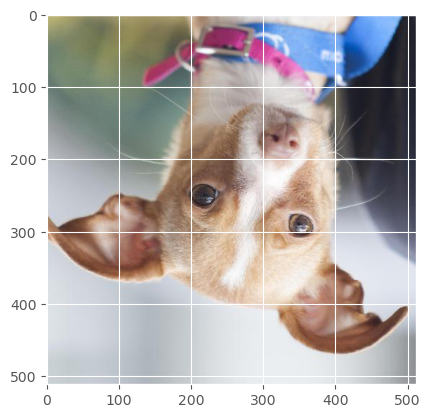

In [10]:
#https://www.geeksforgeeks.org/image-processing-with-scipy-and-numpy-in-python/
from scipy import misc
import imageio
import matplotlib.pyplot as plt


img1 = imgs[8] # select image 8 from 'img_align_dogs' folder
 
flip = np.flipud(img1) #flip variable
 
plt.imshow(flip) # apply flip to image
plt.show()
imageio.imwrite('output_image.jpg', flip) #save the flipped image as 'output_image.jpg' under the variable flip

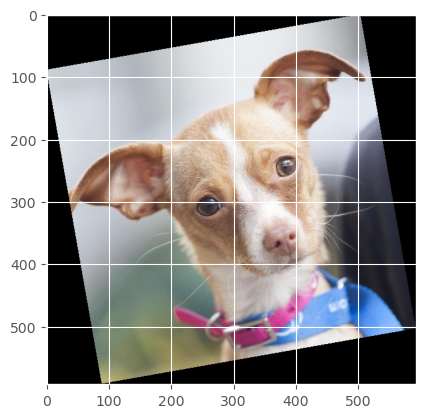

In [11]:
#https://www.geeksforgeeks.org/image-processing-with-scipy-and-numpy-in-python/
from scipy import misc,ndimage
import matplotlib.pyplot as plt
 
img1 = imgs[8] # select image 8 from 'img_align_dogs' folder
 
rotate = ndimage.rotate(img1, 10) #sets rotate variable to 10 degrees
 
plt.imshow(rotate) #apply rotate varaible to image
plt.show() # show image

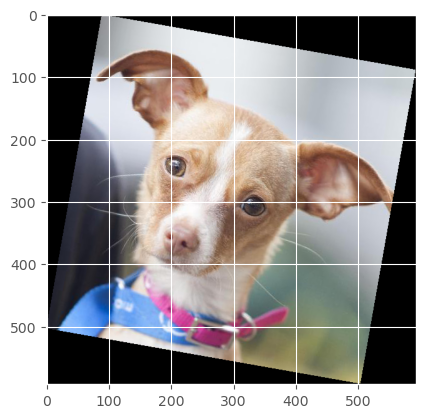

In [12]:
img1 = flip
rotate = ndimage.rotate(img1, 170) #sets rotate variable to 170 degrees

plt.imshow(rotate) #apply rotate varaible to image
plt.show()
imageio.imwrite('output_image2.jpg', rotate) #save the rotated image as 'output_image2.jpg' under the variable rotate

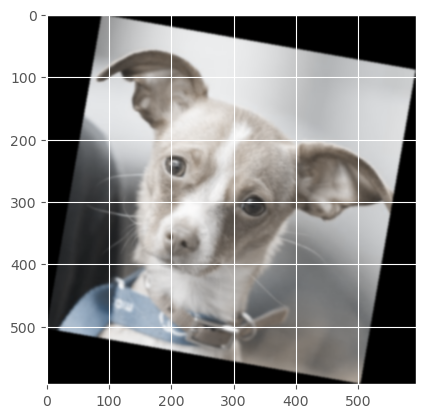

In [13]:
img1 = rotate #takes previous image from line 12 named 'rotate'
 
blur_G = ndimage.gaussian_filter(img1,sigma=1.5) # gaussian_filter
 
plt.imshow(blur_G) # gaussian_filter appllied to 'rotate' image
plt.show()
imageio.imwrite('output_image3.jpg', blur_G) #save the image as 'output_image2.jpg' under the variable blur_G

In [14]:
# -------------------------- Homework End ---------------------------------------